In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
!pip install pycm

In [0]:
#packages
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy
from scipy import ndimage
import cv2
from PIL import Image
from pathlib import Path
import os, sys
import glob
import pycm
from pycm import *

Loading images

In [0]:
IMG_WIDTH = 512
IMG_HEIGHT = 1024
IMG_CHANNELS = 1

# paths to image folders 
GT_path='/content/drive/My Drive/Colab Notebooks/interobserver/GT'
inter_path='/content/drive/My Drive/Colab Notebooks/interobserver/interobserver'
intra_path='/content/drive/My Drive/Colab Notebooks/interobserver/intraobserver'


In [0]:
# reading images 
# fuction return values of images as array [number of images, image_height, image_width, img_channels]

def load_data (path1, path2, path3, total=75):
  m=os.listdir(path1) 
  img1 = np.zeros((total, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
  img2 = np.zeros((total, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
  img3 = np.zeros((total, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
  for i in range (0, total):
   sample1 = cv2.imread(path1 + '/' + m[i], 0) 
   img1[i] = np.reshape(sample1, (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
   sample2 = cv2.imread(path2 + '/' + m[i], 0) 
   img2[i] = np.reshape(sample2, (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
   sample3 = cv2.imread(path3 + '/' + m[i], 0) 
   img3[i] = np.reshape(sample3, (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
  return img1, img2, img3

In [0]:
GT_images, inter_images, intra_images = load_data (GT_path, inter_path, intra_path, total=75)

Plotting images
- cheking if everything is ok

In [0]:
# colour definition
black = np.array([0, 0, 0, 255])
white = np.array([255, 255, 255, 255])
yellow = np.array([255, 255, 0, 255])
red = np.array([255, 0, 0, 255]) 
blue = np.array([0, 0, 255, 255])
light_blue = np.array([0, 255, 255, 255])
green = np.array([0, 255, 0, 255])
pink = np.array([255, 0, 255, 255]) 

# function which trasform mask values 0,1,2,3,4,5,6,7 into colours
def num_to_colors (mask, height, width):
    col_mask = np.zeros((height, width, 4))
    for j in range (0,width):
        for i in range (0,height):
            if (mask[i,j]==0):
                col_mask[i,j]=black
            elif (mask[i,j]==1):
                col_mask[i,j]= red
            elif (mask[i,j]==2):
                col_mask[i,j]=yellow
            elif (mask[i,j]==3):
                col_mask[i,j]=green
            elif (mask[i,j]==4):
                col_mask[i,j]=blue
            elif (mask[i,j]==5):
                col_mask[i,j]=light_blue
            elif (mask[i,j]==6):
                col_mask[i,j]=pink
            elif (mask[i,j]==7):
                col_mask[i,j]=white
           
    return col_mask


Image id: 19 scan (19).png



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


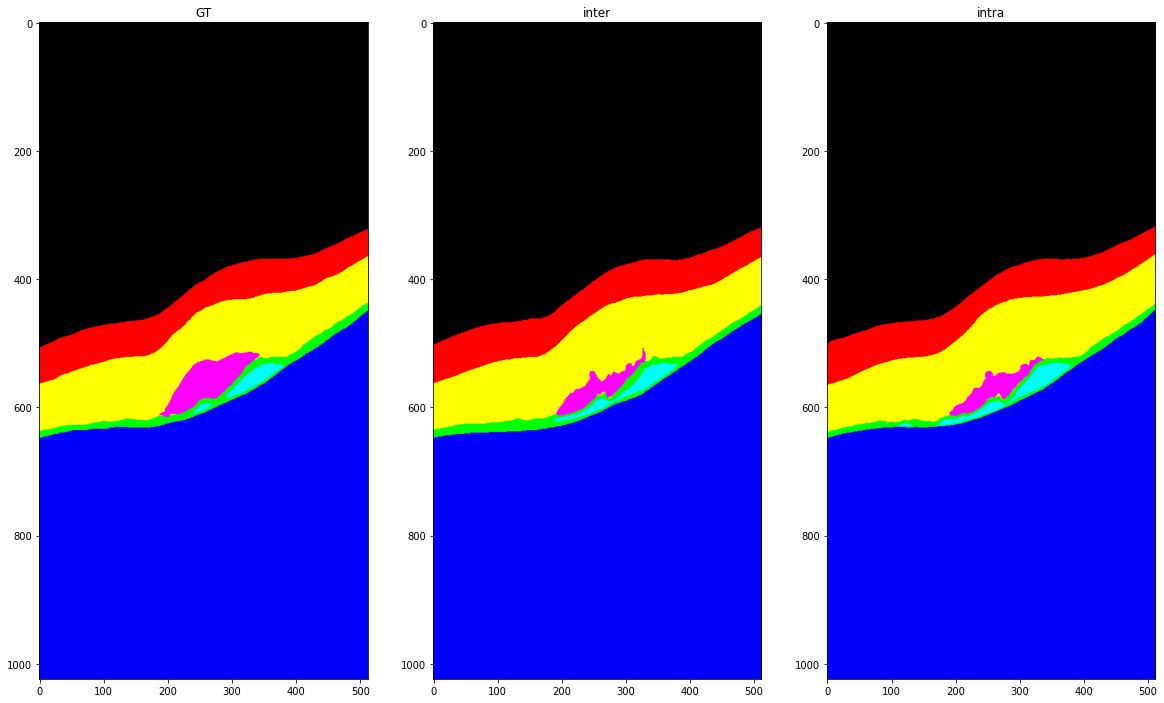

In [37]:
#plotting images
m=os.listdir(GT_path)
i = np.random.randint(0, 75)
print('Image id:',i ,  m[i])
print()
plt.figure(figsize=(20, 20))
plt.subplot(1, 3, 1)
plt.title('GT')
mask1 = np.reshape(GT_images[i], (IMG_HEIGHT, IMG_WIDTH))
mask1 = num_to_colors (mask1, IMG_HEIGHT, IMG_WIDTH)
plt.imshow(mask1)
plt.subplot(1, 3, 2)
plt.title('inter')
mask2 = np.reshape(inter_images[i], (IMG_HEIGHT, IMG_WIDTH))
mask2 = num_to_colors (mask2, IMG_HEIGHT, IMG_WIDTH)
plt.imshow(mask2)
plt.subplot(1, 3, 3)
plt.title('intra')
mask3 = np.reshape(intra_images[i], (IMG_HEIGHT, IMG_WIDTH))
mask3 = num_to_colors (mask3, IMG_HEIGHT, IMG_WIDTH)
plt.imshow(mask3)
plt.show()


In [0]:
GT_vector=GT_images[0].flatten()
for k  in range(1,75):
    GT_vector=np.concatenate((GT_vector, GT_images[k].flatten()), axis=0)


In [41]:
print(np.shape(GT_vector))
print(75*1024*512)

(39321600,)
39321600


In [0]:
inter_vector=inter_images[0].flatten()
for k  in range(1,75):
    inter_vector=np.concatenate((inter_vector, inter_images[k].flatten()), axis=0)

In [0]:
intra_vector=intra_images[0].flatten()
for k  in range(1,75):
    intra_vector=np.concatenate((intra_vector, intra_images[k].flatten()), axis=0)

In [0]:
cm = ConfusionMatrix(actual_vector=GT_vector, predict_vector=inter_vector)

In [45]:
cm.classes

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]

In [46]:
print(cm)

Predict        0.0            1.0            2.0            3.0            4.0            5.0            6.0            7.0            
Actual
0.0            13389597       66291          2138           4613           1347           517            0              0              

1.0            35666          1939834        46474          0              0              0              0              1068           

2.0            43394          55646          2952588        46104          0              1034           17488          12167          

3.0            4593           13             24118          324960         14317          56899          1925           0              

4.0            315682         0              0              66274          18858381       13033          0              0              

5.0            171            0              3170           42200          1086           418485         2056           0              

6.0            2053           0    

In [0]:
print(cm, file=open("interobserver_error.rtf", "a"))



In [0]:
cm = ConfusionMatrix(actual_vector=GT_vector, predict_vector=intra_vector)


In [50]:
print(cm)


Predict        0.0            1.0            2.0            3.0            4.0            5.0            6.0            7.0            
Actual
0.0            13423444       32129          2372           4802           1602           153            1              0              

1.0            8839           1970496        42872          0              0              0              0              835            

2.0            1              22772          3067278        22192          0              517            12181          3480           

3.0            5              0              26018          341004         19106          30667          10025          0              

4.0            2              0              0              33863          19217364       2141           0              0              

5.0            0              0              1011           42183          2375           420520         1079           0              

6.0            0              0    

In [0]:
print(cm, file=open("intraobserver_error.rtf", "a"))


In [0]:
print(cm, file=open("intraobserver_error.txt", "a"))